In [3]:
import pandas as pd
import geopandas as gpd
import re
from shapely.geometry import Point

file_path = '/Users/yujinlee/Google_Drive/NYU/Fall_2023/Capstone/CrimeData'
df = pd.read_csv(file_path + '/seattle_2018_to_2023.csv', low_memory = False)

Crime data: https://data.seattle.gov/Public-Safety/SPD-Crime-Data-2008-Present 
<br>Zipcode data: https://github.com/OpenDataDE/State-zip-code-GeoJSON/blob/master/wa_washington_zip_codes_geo.min.json

In [4]:
df.head()

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude
0,2018-347660,7660504950,01/01/2018 12:00:00 AM,09/17/2018 02:08:00 PM,09/17/2018 04:05:00 PM,A,PROPERTY,LARCENY-THEFT,Theft From Building,23D,N,J,J1,BALLARD NORTH,8XX BLOCK OF NW 95TH ST,-122.366706,47.697866
1,2018-306159,7648277122,01/01/2018 12:00:00 AM,08/17/2018 07:34:00 AM,08/17/2018 07:34:00 AM,A,PROPERTY,FRAUD OFFENSES,Impersonation,26C,S,S,S2,RAINIER BEACH,86XX BLOCK OF ISLAND DR S,-122.261000,47.525617
2,2018-304095,7639729915,01/01/2018 12:00:00 AM,03/31/2018 07:00:00 AM,08/15/2018 08:53:00 PM,A,PERSON,SEX OFFENSES,Fondling,11D,N,L,L2,NORTHGATE,NaN,0.000000,0.000000
3,2018-907128,7697846930,01/01/2018 12:00:00 AM,01/01/2018 12:00:00 AM,08/04/2018 06:35:00 PM,A,PROPERTY,FRAUD OFFENSES,Impersonation,26C,N,J,J3,PHINNEY RIDGE,7XX BLOCK OF N 70TH ST,-122.348588,47.679599
4,2018-283356,7698871738,01/01/2018 12:00:00 AM,01/31/2018 11:59:00 PM,07/31/2018 07:02:00 PM,A,PERSON,SEX OFFENSES,Rape,11A,N,N,N3,NORTHGATE,NaN,0.000000,0.000000


In [7]:
df.shape

(395801, 17)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395801 entries, 0 to 395800
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Report Number           395801 non-null  object 
 1   Offense ID              395801 non-null  int64  
 2   Offense Start DateTime  395801 non-null  object 
 3   Offense End DateTime    258945 non-null  object 
 4   Report DateTime         395801 non-null  object 
 5   Group A B               395801 non-null  object 
 6   Crime Against Category  395801 non-null  object 
 7   Offense Parent Group    395801 non-null  object 
 8   Offense                 395801 non-null  object 
 9   Offense Code            395801 non-null  object 
 10  Precinct                395792 non-null  object 
 11  Sector                  395794 non-null  object 
 12  Beat                    395794 non-null  object 
 13  MCPP                    395796 non-null  object 
 14  100 Block Address   

In [9]:
df.columns = map(str.lower, df.columns)
df.columns = df.columns.str.replace(' ', '_')
df.head()

,report_number,offense_id,offense_start_datetime,offense_end_datetime,report_datetime,group_a_b,crime_against_category,offense_parent_group,offense,offense_code,precinct,sector,beat,mcpp,100_block_address,longitude,latitude
0,2018-347660,7660504950,01/01/2018 12:00:00 AM,09/17/2018 02:08:00 PM,09/17/2018 04:05:00 PM,A,PROPERTY,LARCENY-THEFT,Theft From Building,23D,N,J,J1,BALLARD NORTH,8XX BLOCK OF NW 95TH ST,-122.366706,47.697866
1,2018-306159,7648277122,01/01/2018 12:00:00 AM,08/17/2018 07:34:00 AM,08/17/2018 07:34:00 AM,A,PROPERTY,FRAUD OFFENSES,Impersonation,26C,S,S,S2,RAINIER BEACH,86XX BLOCK OF ISLAND DR S,-122.261000,47.525617
2,2018-304095,7639729915,01/01/2018 12:00:00 AM,03/31/2018 07:00:00 AM,08/15/2018 08:53:00 PM,A,PERSON,SEX OFFENSES,Fondling,11D,N,L,L2,NORTHGATE,NaN,0.000000,0.000000
3,2018-907128,7697846930,01/01/2018 12:00:00 AM,01/01/2018 12:00:00 AM,08/04/2018 06:35:00 PM,A,PROPERTY,FRAUD OFFENSES,Impersonation,26C,N,J,J3,PHINNEY RIDGE,7XX BLOCK OF N 70TH ST,-122.348588,47.679599
4,2018-283356,7698871738,01/01/2018 12:00:00 AM,01/31/2018 11:59:00 PM,07/31/2018 07:02:00 PM,A,PERSON,SEX OFFENSES,Rape,11A,N,N,N3,NORTHGATE,NaN,0.000000,0.000000


In [ ]:
df['offense_start_datetime'] = df['offense_start_datetime'].str.slice(0, 10)
# Convert the 'occurred_on_date' column to datetime
df['offense_start_datetime'] = pd.to_datetime(df['offense_start_datetime'], format='%m/%d/%Y')

In [17]:
df[df['latitude']==0].shape

(23759, 17)

In [18]:
df[df['longitude']==0].shape

(23759, 17)

In [19]:
df = df[df['longitude']!=0]

In [22]:
df['location'] = df.apply(lambda row: f"({row['latitude']}, {row['longitude']})", axis=1)

In [23]:
file_path_geo = file_path + '/wa_washington_zip_codes_geo.min.json'

zipcode = gpd.read_file(file_path_geo)
zipcode.head()

,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry
0,53,98822,5398822,B5,G6350,S,1131837710,5582389,+47.9019257,-120.5504512,N,"POLYGON ((-120.47985 47.68373, -120.48008 47.6..."
1,53,98821,5398821,B5,G6350,S,4754899,198324,+47.5497169,-120.5586129,N,"POLYGON ((-120.57188 47.55317, -120.57191 47.5..."
2,53,98357,5398357,B5,G6350,S,110004759,462073,+48.3338551,-124.6354040,N,"MULTIPOLYGON (((-124.74255 48.39175, -124.7424..."
3,53,98663,5398663,B5,G6350,S,11134084,70154,+45.6573955,-122.6631613,N,"POLYGON ((-122.67066 45.64994, -122.67066 45.6..."
4,53,98684,5398684,B5,G6350,S,18064308,7161,+45.6305560,-122.5148386,N,"POLYGON ((-122.50606 45.64292, -122.50584 45.6..."


In [24]:
def create_point_from_string(coord_str):
    match = re.match(r'\(([^,]+), ([^)]+)\)', coord_str)
    if match:
        lat, lon = map(float, match.groups())
        return Point(lon, lat)
    return None

In [25]:
df['geometry'] = df['location'].apply(create_point_from_string)

In [26]:
df.head()

,report_number,offense_id,offense_start_datetime,offense_end_datetime,report_datetime,group_a_b,crime_against_category,offense_parent_group,offense,offense_code,precinct,sector,beat,mcpp,100_block_address,longitude,latitude,location,geometry
0,2018-347660,7660504950,2018-01-01,09/17/2018 02:08:00 PM,09/17/2018 04:05:00 PM,A,PROPERTY,LARCENY-THEFT,Theft From Building,23D,N,J,J1,BALLARD NORTH,8XX BLOCK OF NW 95TH ST,-122.366706,47.697866,"(47.69786645, -122.36670644)",POINT (-122.36670644 47.69786645)
1,2018-306159,7648277122,2018-01-01,08/17/2018 07:34:00 AM,08/17/2018 07:34:00 AM,A,PROPERTY,FRAUD OFFENSES,Impersonation,26C,S,S,S2,RAINIER BEACH,86XX BLOCK OF ISLAND DR S,-122.261000,47.525617,"(47.52561712, -122.260999956)",POINT (-122.260999956 47.52561712)
3,2018-907128,7697846930,2018-01-01,01/01/2018 12:00:00 AM,08/04/2018 06:35:00 PM,A,PROPERTY,FRAUD OFFENSES,Impersonation,26C,N,J,J3,PHINNEY RIDGE,7XX BLOCK OF N 70TH ST,-122.348588,47.679599,"(47.67959898, -122.348587683)",POINT (-122.348587683 47.67959898)
5,2018-214446,7678773428,2018-01-01,06/13/2018 02:41:00 PM,06/13/2018 02:41:00 PM,A,PROPERTY,FRAUD OFFENSES,False Pretenses/Swindle/Confidence Game,26A,S,O,O2,SODO,8XX BLOCK OF S ADAMS ST,-122.321761,47.566196,"(47.56619631, -122.321760505)",POINT (-122.321760505 47.56619631)
6,2018-137495,7700168935,2018-01-01,04/19/2018 09:53:00 AM,04/19/2018 09:53:00 AM,A,PROPERTY,COUNTERFEITING/FORGERY,Counterfeiting/Forgery,250,S,O,O2,SODO,38XX BLOCK OF 1ST AVE S,-122.334206,47.569889,"(47.56988892, -122.334205833)",POINT (-122.334205833 47.56988892)


In [27]:
gdf = gpd.GeoDataFrame(df, geometry='geometry')
gdf.head()

,report_number,offense_id,offense_start_datetime,offense_end_datetime,report_datetime,group_a_b,crime_against_category,offense_parent_group,offense,offense_code,precinct,sector,beat,mcpp,100_block_address,longitude,latitude,location,geometry
0,2018-347660,7660504950,2018-01-01,09/17/2018 02:08:00 PM,09/17/2018 04:05:00 PM,A,PROPERTY,LARCENY-THEFT,Theft From Building,23D,N,J,J1,BALLARD NORTH,8XX BLOCK OF NW 95TH ST,-122.366706,47.697866,"(47.69786645, -122.36670644)",POINT (-122.36671 47.69787)
1,2018-306159,7648277122,2018-01-01,08/17/2018 07:34:00 AM,08/17/2018 07:34:00 AM,A,PROPERTY,FRAUD OFFENSES,Impersonation,26C,S,S,S2,RAINIER BEACH,86XX BLOCK OF ISLAND DR S,-122.261000,47.525617,"(47.52561712, -122.260999956)",POINT (-122.26100 47.52562)
3,2018-907128,7697846930,2018-01-01,01/01/2018 12:00:00 AM,08/04/2018 06:35:00 PM,A,PROPERTY,FRAUD OFFENSES,Impersonation,26C,N,J,J3,PHINNEY RIDGE,7XX BLOCK OF N 70TH ST,-122.348588,47.679599,"(47.67959898, -122.348587683)",POINT (-122.34859 47.67960)
5,2018-214446,7678773428,2018-01-01,06/13/2018 02:41:00 PM,06/13/2018 02:41:00 PM,A,PROPERTY,FRAUD OFFENSES,False Pretenses/Swindle/Confidence Game,26A,S,O,O2,SODO,8XX BLOCK OF S ADAMS ST,-122.321761,47.566196,"(47.56619631, -122.321760505)",POINT (-122.32176 47.56620)
6,2018-137495,7700168935,2018-01-01,04/19/2018 09:53:00 AM,04/19/2018 09:53:00 AM,A,PROPERTY,COUNTERFEITING/FORGERY,Counterfeiting/Forgery,250,S,O,O2,SODO,38XX BLOCK OF 1ST AVE S,-122.334206,47.569889,"(47.56988892, -122.334205833)",POINT (-122.33421 47.56989)


In [28]:
gdf.set_crs(epsg=4326, inplace=True)
zipcode.set_crs(epsg=4326, inplace=True)
result = gpd.sjoin(gdf, zipcode, how="left", op='within')

/Users/yujinlee/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3309: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [29]:
result.head()

,report_number,offense_id,offense_start_datetime,offense_end_datetime,report_datetime,group_a_b,crime_against_category,offense_parent_group,offense,offense_code,...,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10
0,2018-347660,7660504950,2018-01-01,09/17/2018 02:08:00 PM,09/17/2018 04:05:00 PM,A,PROPERTY,LARCENY-THEFT,Theft From Building,23D,...,98117,5398117,B5,G6350,S,10214490.0,1569166.0,+47.6877607,-122.3848701,N
1,2018-306159,7648277122,2018-01-01,08/17/2018 07:34:00 AM,08/17/2018 07:34:00 AM,A,PROPERTY,FRAUD OFFENSES,Impersonation,26C,...,98118,5398118,B5,G6350,S,16178230.0,6840313.0,+47.5402459,-122.2685446,N
3,2018-907128,7697846930,2018-01-01,01/01/2018 12:00:00 AM,08/04/2018 06:35:00 PM,A,PROPERTY,FRAUD OFFENSES,Impersonation,26C,...,98103,5398103,B5,G6350,S,12005476.0,1705646.0,+47.6782553,-122.3381521,N
5,2018-214446,7678773428,2018-01-01,06/13/2018 02:41:00 PM,06/13/2018 02:41:00 PM,A,PROPERTY,FRAUD OFFENSES,False Pretenses/Swindle/Confidence Game,26A,...,98108,5398108,B5,G6350,S,19384665.0,964749.0,+47.5348617,-122.3057936,N
6,2018-137495,7700168935,2018-01-01,04/19/2018 09:53:00 AM,04/19/2018 09:53:00 AM,A,PROPERTY,COUNTERFEITING/FORGERY,Counterfeiting/Forgery,250,...,98134,5398134,B5,G6350,S,8738521.0,1888144.0,+47.5775985,-122.3380449,N


In [30]:
result.set_index('offense_start_datetime', inplace=True)

In [31]:
result.index = pd.to_datetime(result.index)
result.head()

,report_number,offense_id,offense_end_datetime,report_datetime,group_a_b,crime_against_category,offense_parent_group,offense,offense_code,precinct,...,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10
offense_start_datetime,,,,,,,,,,,,,,,,,,,,,
2018-01-01,2018-347660,7660504950,09/17/2018 02:08:00 PM,09/17/2018 04:05:00 PM,A,PROPERTY,LARCENY-THEFT,Theft From Building,23D,N,...,98117,5398117,B5,G6350,S,10214490.0,1569166.0,+47.6877607,-122.3848701,N
2018-01-01,2018-306159,7648277122,08/17/2018 07:34:00 AM,08/17/2018 07:34:00 AM,A,PROPERTY,FRAUD OFFENSES,Impersonation,26C,S,...,98118,5398118,B5,G6350,S,16178230.0,6840313.0,+47.5402459,-122.2685446,N
2018-01-01,2018-907128,7697846930,01/01/2018 12:00:00 AM,08/04/2018 06:35:00 PM,A,PROPERTY,FRAUD OFFENSES,Impersonation,26C,N,...,98103,5398103,B5,G6350,S,12005476.0,1705646.0,+47.6782553,-122.3381521,N
2018-01-01,2018-214446,7678773428,06/13/2018 02:41:00 PM,06/13/2018 02:41:00 PM,A,PROPERTY,FRAUD OFFENSES,False Pretenses/Swindle/Confidence Game,26A,S,...,98108,5398108,B5,G6350,S,19384665.0,964749.0,+47.5348617,-122.3057936,N
2018-01-01,2018-137495,7700168935,04/19/2018 09:53:00 AM,04/19/2018 09:53:00 AM,A,PROPERTY,COUNTERFEITING/FORGERY,Counterfeiting/Forgery,250,S,...,98134,5398134,B5,G6350,S,8738521.0,1888144.0,+47.5775985,-122.3380449,N


In [32]:
weekly_data = result.groupby('ZCTA5CE10').resample('W').size().reset_index(name='total_count')

In [33]:
weekly_data['ZCTA5CE10'].unique().shape

(34,)

In [34]:
weekly_data

,ZCTA5CE10,offense_start_datetime,total_count
0,98101,2018-01-07,126
1,98101,2018-01-14,132
2,98101,2018-01-21,127
3,98101,2018-01-28,110
4,98101,2018-02-04,141
...,...,...,...
9021,98199,2023-05-07,9
9022,98199,2023-05-14,10
9023,98199,2023-05-21,8
9024,98199,2023-05-28,13


In [36]:
mean_counts_by_zip = weekly_data.groupby('ZCTA5CE10')['total_count'].mean().reset_index()
mean_counts_by_zip

,ZCTA5CE10,total_count
0,98101,90.424028
1,98102,43.469965
2,98103,83.901060
3,98104,84.780919
4,98105,81.819788
5,98106,41.692580
6,98107,54.614841
7,98108,46.155477
8,98109,73.537102
9,98112,32.749117


In [37]:
weekly_data.to_csv(file_path + '/seattle_weekly_data.csv', index=False)

In [45]:
import pandas as pd

file_path = '/Users/yujinlee/Google_Drive/NYU/Fall_2023/Capstone/CrimeData'
weekly_data = pd.read_csv(file_path + '/seattle_weekly_data.csv', low_memory = False)

In [46]:
weekly_data.head()

,ZCTA5CE10,offense_start_datetime,total_count
0,98101,2018-01-07,126
1,98101,2018-01-14,132
2,98101,2018-01-21,127
3,98101,2018-01-28,110
4,98101,2018-02-04,141


In [47]:
pop = pd.read_csv(file_path + '/seattle_2022_acs.csv', low_memory = False)
pop.head()

,Label (Grouping),ZCTA5 98101!!Estimate,ZCTA5 98102!!Estimate,ZCTA5 98103!!Estimate,ZCTA5 98104!!Estimate,ZCTA5 98105!!Estimate,ZCTA5 98106!!Estimate,ZCTA5 98107!!Estimate,ZCTA5 98108!!Estimate,ZCTA5 98109!!Estimate,...,ZCTA5 98144!!Estimate,ZCTA5 98146!!Estimate,ZCTA5 98154!!Estimate,ZCTA5 98155!!Estimate,ZCTA5 98164!!Estimate,ZCTA5 98174!!Estimate,ZCTA5 98177!!Estimate,ZCTA5 98178!!Estimate,ZCTA5 98195!!Estimate,ZCTA5 98199!!Estimate
0,SEX AND AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total population,"16,302","25,827","51,878","15,052","50,302","28,243","28,170","23,762","32,251",...,"32,540","28,088",0,"35,550",239.0,0,"21,114","26,760","2,398","22,359"
2,Male,"9,198","14,261","25,201","9,170","25,660","13,943","14,322","11,970","17,341",...,"17,410","14,445",0,"17,415",155.0,0,"10,402","13,523","1,172","11,384"
3,Female,"7,104","11,566","26,677","5,882","24,642","14,300","13,848","11,792","14,910",...,"15,130","13,643",0,"18,135",84.0,0,"10,712","13,237","1,226","10,975"
4,Sex ratio (males per 100 females),129.5,123.3,94.5,155.9,104.1,97.5,103.4,101.5,116.3,...,115.1,105.9,-,96.0,184.5,-,97.1,102.2,95.6,103.7


In [48]:
pop_transposed = pop.transpose()
pop_transposed = pop_transposed.reset_index()
new_header = pop_transposed.iloc[0]  
pop_transposed = pop_transposed[1:]  
pop_transposed.columns = new_header  # Set the header row as the df header

In [49]:
pop_transposed.head()

,Label (Grouping),SEX AND AGE,Total population,Male,Female,Sex ratio (males per 100 females),Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,...,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,Two or More Races,Two races including Some Other Race,"Two races excluding Some Other Race, and three or more races",Total housing units,"CITIZEN, VOTING AGE POPULATION","Citizen, 18 and over population",Male,Female
1,ZCTA5 98101!!Estimate,NaN,"16,302","9,198","7,104",129.5,267,143,62,191,...,0,17,769,130,639,"12,917",NaN,"12,027","6,404","5,623"
2,ZCTA5 98102!!Estimate,NaN,"25,827","14,261","11,566",123.3,435,379,367,276,...,172,88,"1,947",198,"1,749","17,323",NaN,"22,235","12,164","10,071"
3,ZCTA5 98103!!Estimate,NaN,"51,878","25,201","26,677",94.5,"2,396","1,633","1,722","1,503",...,116,255,"3,136",293,"2,843","27,330",NaN,"41,540","20,459","21,081"
4,ZCTA5 98104!!Estimate,NaN,"15,052","9,170","5,882",155.9,291,166,224,288,...,77,116,774,0,774,"10,101",NaN,"12,113","7,453","4,660"
5,ZCTA5 98105!!Estimate,NaN,"50,302","25,660","24,642",104.1,"1,676","1,540","1,452","7,630",...,114,90,"3,845",419,"3,426","19,940",NaN,"36,901","18,670","18,231"


In [50]:
df = pop_transposed
df.columns = df.columns.str.strip()

if 'level_0' in df.columns:
    df.drop('level_0', axis=1, inplace=True)
df.reset_index(inplace=True)

df_estimates = df[df['Label (Grouping)'].str.contains('!!Estimate')]
df_estimates = df_estimates[['Label (Grouping)', 'Total population']]
df_estimates.set_index(df_estimates['Label (Grouping)'].str.replace('!!Estimate', ''), inplace=True)
df_estimates.drop('Label (Grouping)', axis=1, inplace=True)
pop = df_estimates.reset_index(drop=False)
pop.head()

,Label (Grouping),Total population,Total population,Total population,Total population
0,ZCTA5 98101,"16,302","16,302","16,302","16,302"
1,ZCTA5 98102,"25,827","25,827","25,827","25,827"
2,ZCTA5 98103,"51,878","51,878","51,878","51,878"
3,ZCTA5 98104,"15,052","15,052","15,052","15,052"
4,ZCTA5 98105,"50,302","50,302","50,302","50,302"


In [51]:
pop = pop.rename(columns={"Label (Grouping)": "ZCTA5CE10"})
pop['ZCTA5CE10'] = pop['ZCTA5CE10'].str.replace('ZCTA5 ', '')
pop = pop.iloc[:, [0, 1]]  # Keeps only the first two columns
pop.head()

,ZCTA5CE10,Total population
0,98101,"16,302"
1,98102,"25,827"
2,98103,"51,878"
3,98104,"15,052"
4,98105,"50,302"


In [52]:
weekly_data['ZCTA5CE10'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9026 entries, 0 to 9025
Series name: ZCTA5CE10
Non-Null Count  Dtype
--------------  -----
9026 non-null   int64
dtypes: int64(1)
memory usage: 70.6 KB


In [53]:
weekly_data['ZCTA5CE10'] = weekly_data['ZCTA5CE10'].astype(str).str.zfill(5)

In [54]:
merged_df = pd.merge(weekly_data, pop, on='ZCTA5CE10', how='left')
merged_df.head()

,ZCTA5CE10,offense_start_datetime,total_count,Total population
0,98101,2018-01-07,126,"16,302"
1,98101,2018-01-14,132,"16,302"
2,98101,2018-01-21,127,"16,302"
3,98101,2018-01-28,110,"16,302"
4,98101,2018-02-04,141,"16,302"


In [55]:
merged_df['Total population'] = pd.to_numeric(merged_df['Total population'].str.replace(',', ''), errors='coerce').fillna(0).astype(int)
merged_df['crime_rate'] = (merged_df['total_count'] / merged_df['Total population']) * 10000
merged_df = merged_df.rename(columns={'offense_start_datetime': 'week'})
merged_df = merged_df.rename(columns={'Total population': "total_population"})
merged_df['week'] = pd.to_datetime(merged_df['week'])

In [56]:
merged_df.head()

,ZCTA5CE10,week,total_count,total_population,crime_rate
0,98101,2018-01-07,126,16302,77.291130
1,98101,2018-01-14,132,16302,80.971660
2,98101,2018-01-21,127,16302,77.904552
3,98101,2018-01-28,110,16302,67.476383
4,98101,2018-02-04,141,16302,86.492455


In [57]:
merged_df.shape

(9026, 5)

In [58]:
merged_df = merged_df[merged_df['total_population'] != 0]

In [59]:
merged_df.shape

(7773, 5)

In [60]:
merged_df.to_csv(file_path + '/seattle_weekly_data_rate.csv', index=False)

In [23]:
df_plot = merged_df

In [24]:
df_plot.set_index('week', inplace=True)

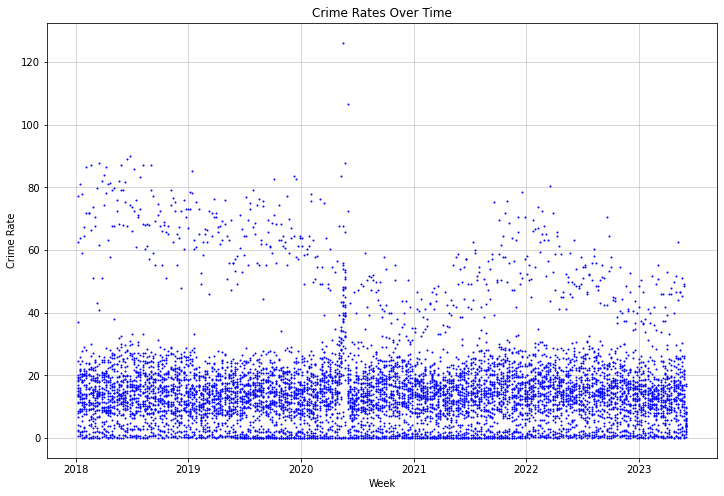

In [26]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(df_plot.index, df_plot['crime_rate'], marker='o', linestyle='None', color='b', markersize=1)

plt.title('Crime Rates Over Time')
plt.xlabel('Week')
plt.ylabel('Crime Rate')
plt.grid(True, linewidth=0.5)
plt.show()

In [43]:
df_plot_temp = df_plot.reset_index()

In [48]:
df_plot_temp

,week,ZCTA5CE10,total_count,total_population,crime_rate
0,2018-01-07,98101,126,16302,77.291130
5943,2018-01-07,98144,62,32540,19.053473
5094,2018-01-07,98126,32,21102,15.164439
4811,2018-01-07,98125,88,43993,20.003182
4528,2018-01-07,98122,102,41268,24.716487
...,...,...,...,...,...
1131,2023-06-04,98104,26,15052,17.273452
848,2023-06-04,98103,15,51878,2.891399
565,2023-06-04,98102,15,25827,5.807875
3678,2023-06-04,98117,13,36115,3.599612


In [49]:
df_plot_temp = df_plot_temp.sort_values(by='week').reset_index()

In [57]:
min_date = df_plot_temp['week'].min()
df_plot_temp['week_no'] = ((df_plot_temp['week'] - min_date).dt.days // 7) + 1

In [58]:
df_plot_temp

,index,week,ZCTA5CE10,total_count,total_population,crime_rate,week_no
0,0,2018-01-07,98101,126,16302,77.291130,1
1,1132,2018-01-07,98105,98,50302,19.482327,1
2,5660,2018-01-07,98136,15,17420,8.610792,1
3,5377,2018-01-07,98133,69,50921,13.550402,1
4,1415,2018-01-07,98106,45,28243,15.933152,1
...,...,...,...,...,...,...,...
7768,5942,2023-06-04,98136,2,17420,1.148106,283
7769,6225,2023-06-04,98144,32,32540,9.834050,283
7770,3678,2023-06-04,98117,13,36115,3.599612,283
7771,3112,2023-06-04,98115,21,54457,3.856254,283


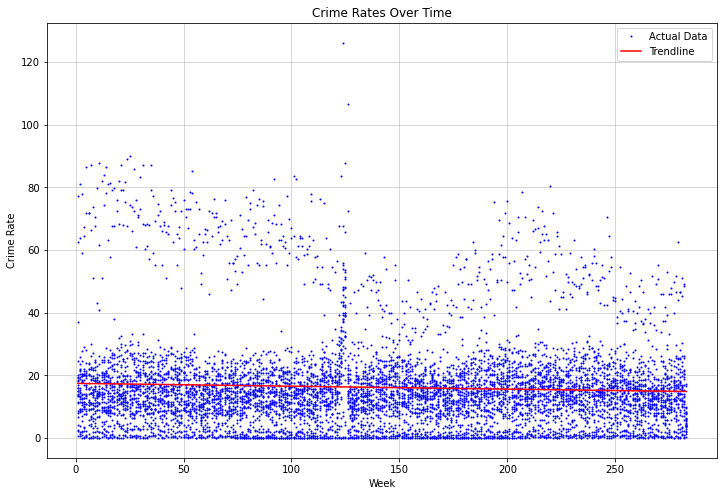

In [59]:
x = np.arange(len(df_plot_temp['week_no'])).reshape(-1, 1)
y = df_plot_temp['crime_rate']

# Fit linear regression
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(df_plot_temp['week_no'], y, marker='o', linestyle='None', color='b', markersize=1, label='Actual Data')
plt.plot(df_plot_temp['week_no'], y_pred, color='r', label='Trendline')

plt.title('Crime Rates Over Time')
plt.xlabel('Week')
plt.ylabel('Crime Rate')
plt.grid(True, linewidth=0.5)
plt.legend()
plt.show()

# Covariate Analysis

In [1]:
import pandas as pd
file_path = '/Users/yujinlee/Google_Drive/NYU/Fall_2023/Capstone/CrimeData'

## S2301 Employment

In [75]:
employment = pd.read_csv(file_path + '/control/seattle/ACSST5Y2018.S2301-Data.csv', low_memory=False)
employment = employment[['NAME', 'S2301_C03_001E', 'S2301_C04_001E']]
employment = employment.iloc[1:].reset_index(drop=True)
employment.columns = ['ZCTA5CE10', 'e/pop', 'un_rate']
employment['ZCTA5CE10'] = employment['ZCTA5CE10'].str.replace('ZCTA5 ', '')
employment.head()

,ZCTA5CE10,e/pop,un_rate
0,98001,63.6,4.8
1,98002,58.6,6.6
2,98003,61.3,6.6
3,98004,64.5,4.4
4,98005,65.8,3.0


In [76]:
employment.shape

(598, 3)

## S1701 poverty

In [77]:
poverty = pd.read_csv(file_path + '/control/seattle/ACSST5Y2018.S1701-Data.csv', low_memory=False)
poverty = poverty[['NAME', 'S1701_C03_001E']]
poverty = poverty.iloc[1:].reset_index(drop=True)
poverty.columns = ['ZCTA5CE10', 'p_rate']
poverty['ZCTA5CE10'] = poverty['ZCTA5CE10'].str.replace('ZCTA5 ', '')
poverty.head()

,ZCTA5CE10,p_rate
0,98001,8.7
1,98002,16.9
2,98003,16.7
3,98004,6.3
4,98005,6.4


In [78]:
poverty.shape

(598, 2)

## S1901 Household Income 

In [79]:
income = pd.read_csv(file_path + '/control/seattle/ACSST5Y2018.S1901-Data.csv', low_memory=False)
income = income[['NAME', 'S1901_C01_012E', 'S1901_C01_013E']]
income = income.iloc[1:].reset_index(drop=True)
income.columns = ['ZCTA5CE10', 'in_median', 'in_mean']
income['ZCTA5CE10'] = income['ZCTA5CE10'].str.replace('ZCTA5 ', '')
income.head()

,ZCTA5CE10,in_median,in_mean
0,98001,82581,97847
1,98002,54309,64742
2,98003,57185,74597
3,98004,125190,185707
4,98005,113707,157805


In [80]:
income.shape

(598, 3)

In [81]:
income.dtypes

ZCTA5CE10    object
in_median    object
in_mean      object
dtype: object

## COVID data

In [6]:
import pandas as pd

In [16]:
file_path = '/Users/yujinlee/Google_Drive/NYU/Fall_2023/Capstone/CrimeData'
covid = pd.read_csv(file_path + '/control/seattle/seattle_covid.csv')
covid.head()

,geo_id,pop,week_start,week_end,case_count,hosp_count,death_count,total_hosp_incidental,pcr_test_count,pcr_test_pos_count,pcr_test_pos_percent
0,98001,35393.0476,12/29/2019,01/04/2020,0,0,0,0,0.0,0.0,#NUM!
1,98001,35393.0476,01/05/2020,01/11/2020,0,0,0,0,0.0,0.0,#NUM!
2,98001,35393.0476,01/12/2020,01/18/2020,0,0,0,0,0.0,0.0,#NUM!
3,98001,35393.0476,01/19/2020,01/25/2020,0,0,0,0,0.0,0.0,#NUM!
4,98001,35393.0476,01/26/2020,02/01/2020,0,0,0,0,0.0,0.0,#NUM!


In [17]:
# Keep only the specified columns
covid = covid[['geo_id', 'week_start', 'case_count']]

# Rename 'geo_id' to 'ZCTA5CE10'
covid.rename(columns={'geo_id': 'ZCTA5CE10', 'week_start': 'week'}, inplace=True)

# Convert 'week_start' to the specified date format
covid['week'] = pd.to_datetime(covid['week']).dt.strftime('%Y-%m-%d')

# Display the first few rows of the modified dataframe
covid.head()

,ZCTA5CE10,week,case_count
0,98001,2019-12-29,0
1,98001,2020-01-05,0
2,98001,2020-01-12,0
3,98001,2020-01-19,0
4,98001,2020-01-26,0


In [19]:
covid['case_count'].dtype

dtype('int64')

In [18]:
covid.to_csv(file_path + '/control/seattle/seattle_covid_clean.csv', index=False)

# Merge Data 

In [82]:
merged_df = pd.read_csv(file_path + '/seattle_weekly_data_rate.csv')
merged_df['ZCTA5CE10'] = merged_df['ZCTA5CE10'].astype(str).str.zfill(5)
merged_df.head()

,ZCTA5CE10,week,total_count,total_population,crime_rate
0,98101,2018-01-07,126,16302,77.291130
1,98101,2018-01-14,132,16302,80.971660
2,98101,2018-01-21,127,16302,77.904552
3,98101,2018-01-28,110,16302,67.476383
4,98101,2018-02-04,141,16302,86.492455


In [83]:
#create a year variable
merged_df['week'] = pd.to_datetime(merged_df['week'])
merged_df['year'] = merged_df['week'].dt.year

In [84]:
merged_df.head()

,ZCTA5CE10,week,total_count,total_population,crime_rate,year
0,98101,2018-01-07,126,16302,77.291130,2018
1,98101,2018-01-14,132,16302,80.971660,2018
2,98101,2018-01-21,127,16302,77.904552,2018
3,98101,2018-01-28,110,16302,67.476383,2018
4,98101,2018-02-04,141,16302,86.492455,2018


In [85]:
merged_df = pd.merge(merged_df, employment, on='ZCTA5CE10', how='left')

In [86]:
merged_df = pd.merge(merged_df, poverty, on='ZCTA5CE10', how='left')
merged_df.head()

,ZCTA5CE10,week,total_count,total_population,crime_rate,year,e/pop,un_rate,p_rate
0,98101,2018-01-07,126,16302,77.291130,2018,67.5,3.8,14.7
1,98101,2018-01-14,132,16302,80.971660,2018,67.5,3.8,14.7
2,98101,2018-01-21,127,16302,77.904552,2018,67.5,3.8,14.7
3,98101,2018-01-28,110,16302,67.476383,2018,67.5,3.8,14.7
4,98101,2018-02-04,141,16302,86.492455,2018,67.5,3.8,14.7


In [87]:
merged_df = pd.merge(merged_df, income, on='ZCTA5CE10', how='left')
merged_df.head()

,ZCTA5CE10,week,total_count,total_population,crime_rate,year,e/pop,un_rate,p_rate,in_median,in_mean
0,98101,2018-01-07,126,16302,77.291130,2018,67.5,3.8,14.7,74394,111380
1,98101,2018-01-14,132,16302,80.971660,2018,67.5,3.8,14.7,74394,111380
2,98101,2018-01-21,127,16302,77.904552,2018,67.5,3.8,14.7,74394,111380
3,98101,2018-01-28,110,16302,67.476383,2018,67.5,3.8,14.7,74394,111380
4,98101,2018-02-04,141,16302,86.492455,2018,67.5,3.8,14.7,74394,111380


In [88]:
merged_df['week'] = pd.to_datetime(merged_df['week'])
covid['week'] = pd.to_datetime(covid['week'])

In [89]:
merged_df = merged_df = pd.merge(merged_df, covid, on=['ZCTA5CE10', 'week'], how='left').fillna(0)
merged_df.head()

,ZCTA5CE10,week,total_count,total_population,crime_rate,year,e/pop,un_rate,p_rate,in_median,in_mean,case_count
0,98101,2018-01-07,126,16302,77.291130,2018,67.5,3.8,14.7,74394,111380,0.0
1,98101,2018-01-14,132,16302,80.971660,2018,67.5,3.8,14.7,74394,111380,0.0
2,98101,2018-01-21,127,16302,77.904552,2018,67.5,3.8,14.7,74394,111380,0.0
3,98101,2018-01-28,110,16302,67.476383,2018,67.5,3.8,14.7,74394,111380,0.0
4,98101,2018-02-04,141,16302,86.492455,2018,67.5,3.8,14.7,74394,111380,0.0


In [90]:
rows_with_na = merged_df[merged_df.isna().any(axis=1)]
rows_with_na

,ZCTA5CE10,week,total_count,total_population,crime_rate,year,e/pop,un_rate,p_rate,in_median,in_mean,case_count


In [92]:
merged_df[merged_df['in_median']== '-']

,ZCTA5CE10,week,total_count,total_population,crime_rate,year,e/pop,un_rate,p_rate,in_median,in_mean,case_count
7357,98195,2019-05-26,1,2398,4.170142,2019,0.0,-,-,-,-,0.0
7358,98195,2019-06-02,0,2398,0.000000,2019,0.0,-,-,-,-,0.0
7359,98195,2019-06-09,0,2398,0.000000,2019,0.0,-,-,-,-,0.0
7360,98195,2019-06-16,0,2398,0.000000,2019,0.0,-,-,-,-,0.0
7361,98195,2019-06-23,0,2398,0.000000,2019,0.0,-,-,-,-,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7485,98195,2021-11-07,0,2398,0.000000,2021,0.0,-,-,-,-,2.0
7486,98195,2021-11-14,0,2398,0.000000,2021,0.0,-,-,-,-,1.0
7487,98195,2021-11-21,0,2398,0.000000,2021,0.0,-,-,-,-,1.0
7488,98195,2021-11-28,1,2398,4.170142,2021,0.0,-,-,-,-,0.0


In [94]:
merged_df = merged_df[merged_df['ZCTA5CE10'] != '98195']
merged_df[merged_df['in_median']== '-']

,ZCTA5CE10,week,total_count,total_population,crime_rate,year,e/pop,un_rate,p_rate,in_median,in_mean,case_count


In [96]:
crime_df = merged_df

crime_df['in_median'] = crime_df['in_median'].astype(float)
crime_df['in_mean'] = crime_df['in_median'].astype(float)

crime_df['p_rate'] = pd.to_numeric(crime_df['p_rate'], errors='coerce')
crime_df['un_rate'] = pd.to_numeric(crime_df['un_rate'], errors='coerce')

In [97]:
min_date = crime_df['week'].min()
crime_df['week_no'] = ((crime_df['week'] - min_date).dt.days // 7) + 1
crime_df.head()

,ZCTA5CE10,week,total_count,total_population,crime_rate,year,e/pop,un_rate,p_rate,in_median,in_mean,case_count,week_no
0,98101,2018-01-07,126,16302,77.291130,2018,67.5,3.8,14.7,74394.0,74394.0,0.0,1
1,98101,2018-01-14,132,16302,80.971660,2018,67.5,3.8,14.7,74394.0,74394.0,0.0,2
2,98101,2018-01-21,127,16302,77.904552,2018,67.5,3.8,14.7,74394.0,74394.0,0.0,3
3,98101,2018-01-28,110,16302,67.476383,2018,67.5,3.8,14.7,74394.0,74394.0,0.0,4
4,98101,2018-02-04,141,16302,86.492455,2018,67.5,3.8,14.7,74394.0,74394.0,0.0,5


In [104]:
crime_df.describe()

,total_count,total_population,crime_rate,year,un_rate,p_rate,in_median,in_mean,case_count,week_no,y_hat
count,7640.000000,7640.000000,7640.000000,7640.000000,7640.000000,7640.000000,7640.000000,7640.000000,7640.000000,7640.000000,7640.000000
mean,47.446466,31487.222644,16.441988,2020.243455,4.203599,11.392395,85586.137435,85586.137435,27.109948,141.981545,16.441988
std,31.176957,11615.057030,14.003174,1.584020,1.384048,6.213496,20060.391057,20060.391057,67.724943,81.689317,7.311151
min,0.000000,15052.000000,0.000000,2018.000000,2.000000,4.000000,43601.000000,43601.000000,0.000000,1.000000,0.718988
25%,25.000000,22359.000000,8.640836,2019.000000,3.200000,6.100000,67556.000000,67556.000000,0.000000,71.000000,12.170228
50%,45.000000,28088.000000,14.162801,2020.000000,3.800000,9.200000,86525.000000,86525.000000,7.000000,142.000000,14.933054
75%,69.000000,41268.000000,19.879304,2022.000000,5.000000,14.700000,107276.000000,107276.000000,27.000000,213.000000,19.890995
max,287.000000,54457.000000,126.229073,2023.000000,7.300000,30.500000,115265.000000,115265.000000,1127.000000,283.000000,35.931811


In [101]:
crime_df.to_csv(file_path + '/clean/seattle_weekly_data_with_covariates.csv', index=False)

# Regression

In [102]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
model = smf.ols('crime_rate ~ week_no + p_rate + un_rate + in_median + case_count', data=crime_df).fit()
crime_df['y_hat'] = model.predict(crime_df)
print(crime_df['y_hat'].mean())
print(model.summary())

16.44198839164681
                            OLS Regression Results                            
Dep. Variable:             crime_rate   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     572.2
Date:                Fri, 01 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:43:56   Log-Likelihood:                -29789.
No. Observations:                7640   AIC:                         5.959e+04
Df Residuals:                    7634   BIC:                         5.963e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.8775      1.479  

In [103]:
crime_df.to_csv(file_path + '/seattle_weekly_data_with_prediction.csv', index=False)